### Introduction - Layout Projection Project:
> ##### Task Objective: Use multiple projectors on the ceiling to create a life-size projection of an architectural layout onto the floor
> Requirements: 
> - Projectors must sync with each other to seamlessly create 1 single image
>
> - The projected image dimension and orientation must match the layout dimension and orientation to be life-size
>
> - Projectors must all auto level based on setup height to produce a stable, clear image
>
> - Must have a quick connect/disconnect mechanism to accelerate the process of installing and dismantling the hardware system
>
> - The whole computing process must be automated as much as possible to with minimal manual actions to reduce setup time
>


### 1) Show Image:

- Import neccessary libraries

In [14]:
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

- Show the layout with matplotlib

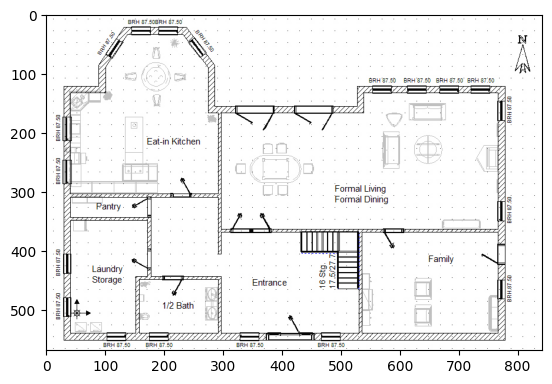

In [10]:
plt.imshow(mpimg.imread('example_layout.jpg'))

### 2) Transpose Grid Onto Layout:

- We'll make it an x by y grid
- Lets also put it into a function
    - `transpose_grid_on_image(rows, columns)`

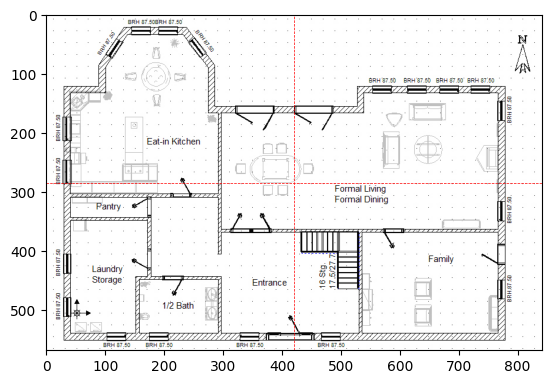

In [11]:
# Constants
ROWS = 2
COLUMNS = 2

"""

    Overlay a grid on an image using matplotlib.

    Parameters:
    - rows (int): Number of rows in the grid.
    - columns (int): Number of columns in the grid.
    - image_path (str): Path to the image file.

    Returns:
    - None

"""
def transpose_grid_on_image(rows, columns, image_path):
    # Load the image
    image = mpimg.imread(image_path)

    # Display the image
    plt.imshow(image)

    # Set up grid parameters
    height, width, depth = image.shape
    x_step = width / columns
    y_step = height / rows

    # Add grid lines
    for i in range(1, rows):
        plt.axhline(i * y_step, color='red', linestyle='--', linewidth=0.5)
    for j in range(1, columns):
        plt.axvline(j * x_step, color='red', linestyle='--', linewidth=0.5)

    # Show the grid
    plt.show()

# Example usage (a 5 by 5 projector layout):
transpose_grid_on_image(ROWS, COLUMNS, 'example_layout.jpg')


### 3) Splice Image & Save Into Directory:

- Modify the `transpose_grid_on_image` function to also save each spliced image into a directory
- Lets rename the function as well to `splice_image`

TRANSPOSED GRID LAYOUT: 


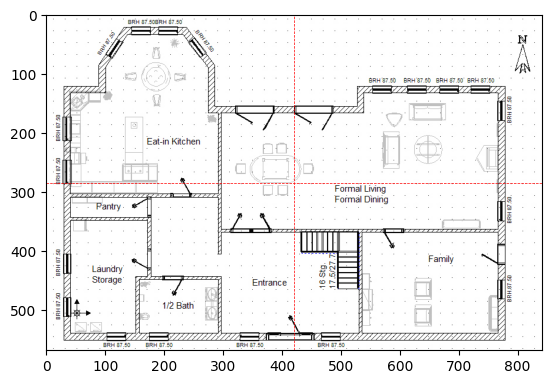

SLICED IMAGES: 


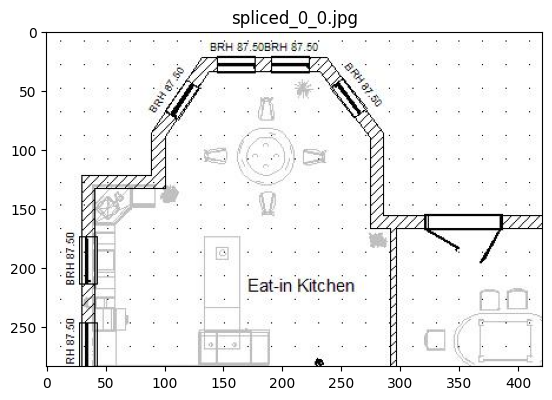

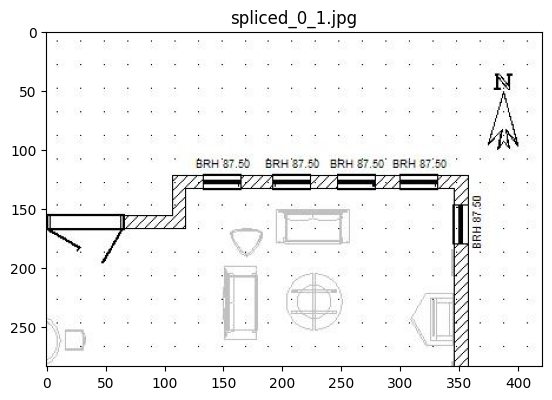

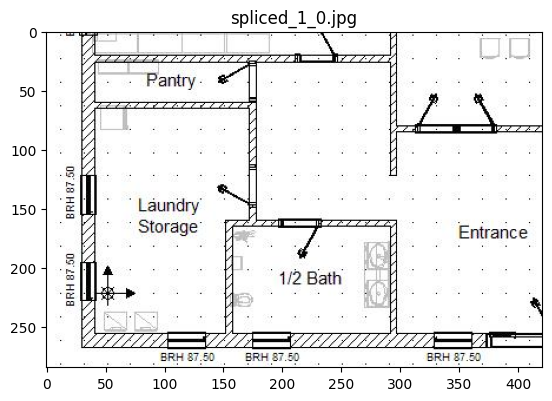

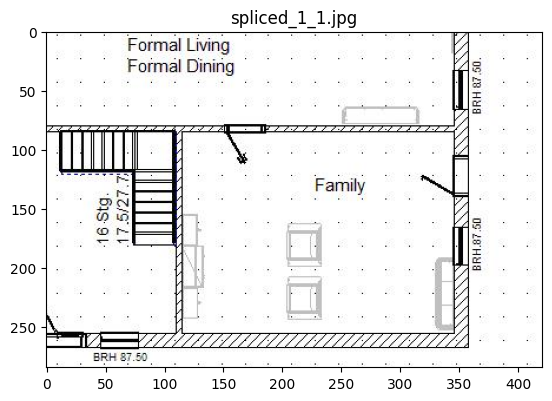

In [19]:
"""

    Overlay a grid on an image and splice it into grid cells, saving each cell as an individual image.

    Parameters:
    - rows (int): Number of rows in the grid.
    - columns (int): Number of columns in the grid.
    - image_path (str): Path to the image file.
    - save_directory (str): Directory to save the spliced images.

    Returns:
    - None

"""

SAVE_DIRECTORY = 'spliced_layouts'

def splice_image(rows, columns, image_path, save_directory):
    # Delete the directory if it already exists
    if os.path.exists(save_directory):
        shutil.rmtree(save_directory)

    # Create the save directory
    os.makedirs(save_directory)

    # Load the image
    image = mpimg.imread(image_path)

    # Set up grid parameters
    height, width, depth = image.shape
    x_step = width / columns
    y_step = height / rows

    # Splice the image and save each cell
    for i in range(rows):
        for j in range(columns):
            # Calculate coordinates for cropping
            x_start = int(j * x_step)
            y_start = int(i * y_step)
            x_end = int((j + 1) * x_step)
            y_end = int((i + 1) * y_step)

            # Crop the image
            cropped_image = image[y_start:y_end, x_start:x_end]

            # Save the cropped image
            save_path = os.path.join(save_directory, f'spliced_{i}_{j}.jpg')
            plt.imsave(save_path, cropped_image)

    # Display the original image with grid lines
    print("TRANSPOSED GRID LAYOUT: ")
    plt.imshow(image)
    for i in range(1, rows):
        plt.axhline(i * y_step, color='red', linestyle='--', linewidth=0.5)
    for j in range(1, columns):
        plt.axvline(j * x_step, color='red', linestyle='--', linewidth=0.5)
    plt.show()

    print("SLICED IMAGES: ")
    # Display the saved images from the directory
    for filename in os.listdir(save_directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(save_directory, filename)
            img = mpimg.imread(img_path)
            plt.imshow(img)
            plt.title(filename)
            plt.show()


# Example usage:
splice_image(ROWS, COLUMNS, 'example_layout.jpg', SAVE_DIRECTORY)

